To implement the logistic regression model for classifying Singaporean households into income brackets using Python, we'll follow these steps:
Load and Prepare the Data
Exploratory Data Analysis
Preprocess the Data
Define income brackets based on the income feature
categorize Singapore households into 2  income brackets
1. Income of the majority -income <=50K
2. Income for high level- income  >50K 
Model Building
Model Evaluation

In [8]:
import pandas as pd

# Load the dataset
data_path = "income_classfication.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and its summary
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educationlevel  32561 non-null  int64 
 5   maritalstatus   32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capitalgain     32561 non-null  int64 
 10  capitalloss     32561 non-null  int64 
 11  hoursperweek    32561 non-null  int64 
 12  nativecountry   32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


(   age         workclass  fnlwgt  education  educationlevel  \
 0   39         State-gov   77516  Bachelors              13   
 1   50  Self-emp-not-inc   83311  Bachelors              13   
 2   38           Private  215646    HS-grad               9   
 3   53           Private  234721       11th               7   
 4   28           Private  338409  Bachelors              13   
 
         maritalstatus         occupation   relationship     sex  capitalgain  \
 0       Never-married       Adm-clerical  Not-in-family    Male         2174   
 1  Married-civ-spouse    Exec-managerial        Husband    Male            0   
 2            Divorced  Handlers-cleaners  Not-in-family    Male            0   
 3  Married-civ-spouse  Handlers-cleaners        Husband    Male            0   
 4  Married-civ-spouse     Prof-specialty           Wife  Female            0   
 
    capitalloss  hoursperweek nativecountry income  
 0            0            40      Singpore  <=50K  
 1            0     

In [9]:
pd.concat([data.head(2),data.tail(2)])

,age,workclass,fnlwgt,education,educationlevel,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,Singpore,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,Singpore,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,Singpore,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,15024,0,40,Singpore,>50K


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate the features and the target variable
X = data.iloc[:, :-1]  # All columns except the last one (income)
y = data.iloc[:, -1]   # The last column (income)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64']).columns.tolist()

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform both training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Display the shape of the transformed features
X_train_transformed.shape, X_test_transformed.shape


((26048, 62), (6513, 62))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)

# Train the model on the training data
model.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_transformed)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('The model achieved an accuracy',accuracy)
print(class_report)



The model achieved an accuracy 0.8572086596038692
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.75      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



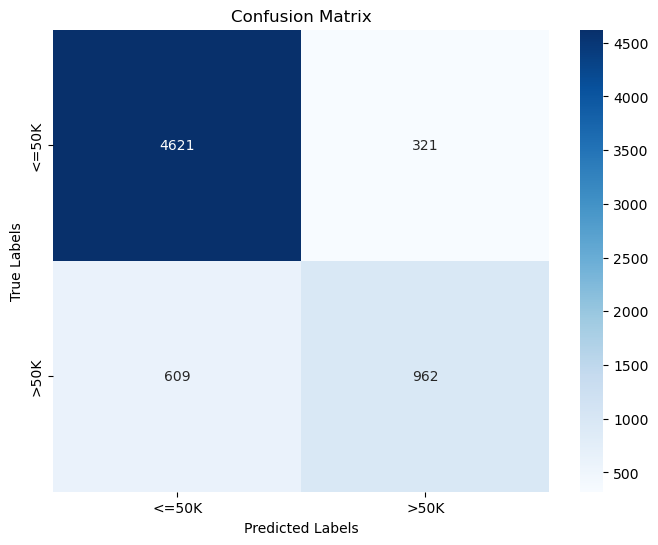

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

